# Entrega Tema 1
### Autor: Luis Ardévol Mesa

In [1]:
%pip install pandas matplotlib seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.


# Tarea 1. AirBnB

## Posibles mejoras

* Modelo de precios dinámico en función de la oferta y la demanda. Según los datos de años anteriores podemos ver estacionalidad en cada zona para ajustar los precios en función de la demanda.
* Sistema de recomendación en base al historial de búsqueda y/o reservas anteriores. 
* Detección de opiniones falsas hechas por los anfitriones. En ocasiones, los afitriones crean opiniones positivas falses para mejorar su puntuación y atraer a más clientes, ya que esto es un factor fundamental a la hora de elegir alojamiento.

## Lectura de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './Datos/MO_dataset_airbnb_nyc.xlsx'
data = pd.read_excel(file_path, header=0)
data.head()

,id,name,host_id,host_name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Private room,149.0,1.0,9.0,0.21,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Entire home/apt,225.0,1.0,45.0,0.38,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Private room,150.0,3.0,0.0,NaN,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Entire home/apt,89.0,1.0,270.0,4.64,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,Entire home/apt,80.0,10.0,9.0,0.10,0.0


## Limpieza y preprocesamiento de datos

Antes de segmentar los alojamientos, vamos a analizarlos y corregir posibles errores para hacer un análisis más preciso.

In [2]:
# verificamos si hay valores faltantes
data.isnull().sum()

id                       0
name                     4
host_id                  7
host_name               11
neighbourhood_group      7
room_type                7
price                    9
minimum_nights           7
number_of_reviews        9
reviews_per_month      572
availability_365         7
dtype: int64

Para tratar los valores ausentes podemos seguir varias estrategias:
* La columna 'host_id' es indispensable para indentificar quién ofrece un alojamiento; en ella existen 7 valores ausentes y con los datos disponibles no hay forma de obtenerlos, por lo que consideramos eliminiar los registros asociados a estos alojamientos.
* Las columnas 'neighbourhood_group' y 'room_type' podrían reemplazarse por la moda de cada una de ellas, pero esto nos puede dar información incorrecta. Siendo pocos registros los que tienen valores ausentes en estas categorías, consideramos eliminar también los registros asociados a estos alojamientos.
* Los valores ausentes en las columnas 'price', 'minimum_nights' y 'availability_365' los reemplazaremos por un valor de tendencia central, la mediana. Podríamos usar la media, pero esta es más sensible a los valores extremos. 
* Los valores ausentes en las columnas 'name' y 'host_name' no son de gran relevancia mientras sea un alojamiento identificable por su 'id' y su 'host_id'. Como con el conocimiento de los datos no podemos imputar valores, optamos por añadir un valor 'Desconocido' en estos campos, conservando así los alojamientos de cara al posterior análisis.

Convertimos las columnas 'host_id', 'minimum_nights', 'number_of_reviews' y 'availability_365' a enteros, ya que al leer el DataFrame se interpretaron como `float`. 

Por último, corregimos un error de escritura y cambiamos la zona 'Bookyn' por 'Brooklyn'.

In [4]:
data = data.dropna(subset=['host_id', 'neighbourhood_group', 'room_type'])

cols_median = ['price', 'minimum_nights', 'availability_365']
data[cols_median] = data[cols_median].apply(lambda x: x.fillna(x.median()))
cols_0 = ['number_of_reviews', 'reviews_per_month']
data[cols_0] = data[cols_0].apply(lambda x: x.fillna(0))

cols_desconocidas = ['name', 'host_name']
data[cols_desconocidas] = data[cols_desconocidas].fillna("Desconocido")

data['neighbourhood_group'] = data['neighbourhood_group'].replace("Bookyn", "Brooklyn")

cols_int = ['host_id', 'minimum_nights', 'number_of_reviews', 'availability_365']
data[cols_int] = data[cols_int].apply(lambda x: x.astype(int))

print(f'Nulos: {data.isnull().sum().sum()}')
data.info()

data.head()

Nulos: 0
<class 'pandas.core.frame.DataFrame'>
Index: 6117 entries, 0 to 6123
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6117 non-null   int64  
 1   name                 6117 non-null   object 
 2   host_id              6117 non-null   int64  
 3   host_name            6117 non-null   object 
 4   neighbourhood_group  6117 non-null   object 
 5   room_type            6117 non-null   object 
 6   price                6117 non-null   float64
 7   minimum_nights       6117 non-null   int64  
 8   number_of_reviews    6117 non-null   int64  
 9   reviews_per_month    6117 non-null   float64
 10  availability_365     6117 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 573.5+ KB


,id,name,host_id,host_name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Private room,149.0,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Entire home/apt,225.0,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Private room,150.0,3,0,0.00,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Entire home/apt,89.0,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,Entire home/apt,80.0,10,9,0.10,0


Con este preprocesado de los datos, nos quedamos con 6117 registros de los 6124 originales.

## Tareas de análisis
### ¿Qué zonas de Nueva York son las que ofrecen una mayor oferta de alojamiento?

  neighbourhood_group  count
2           Manhattan   2824
1            Brooklyn   2741
3              Queens    432
0               Bronx     85
4       Staten Island     35


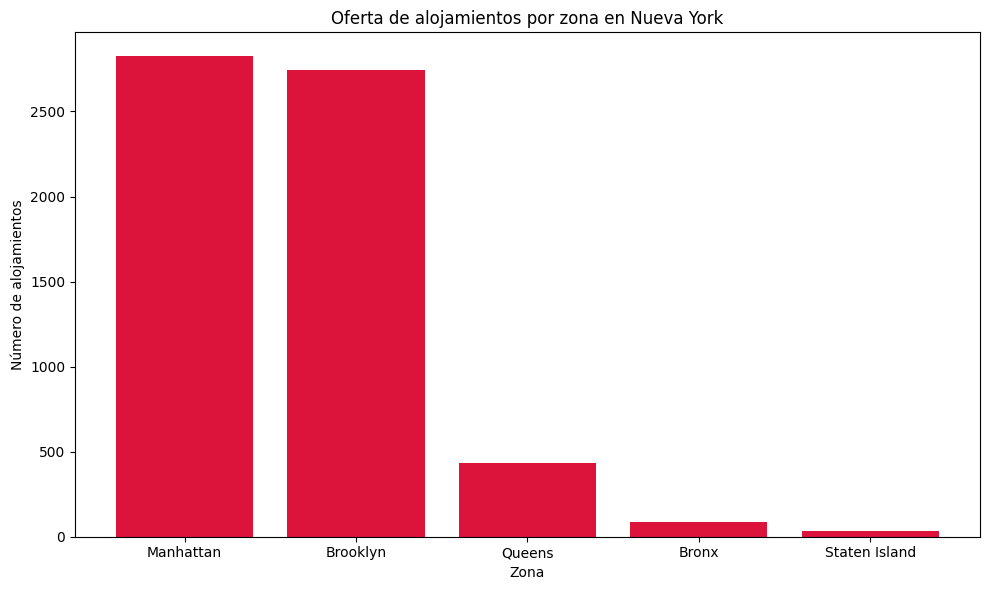

In [5]:
agrupamiento_zonas = (data.groupby(['neighbourhood_group'])
                      .size()
                      .reset_index(name='count')
                      .sort_values(by='count', ascending=False))

print(agrupamiento_zonas)

plt.figure(figsize=(10, 6))
plt.bar(agrupamiento_zonas['neighbourhood_group'], agrupamiento_zonas['count'], color='crimson')
plt.title('Oferta de alojamientos por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Número de alojamientos')
plt.tight_layout()
plt.show()

Podemos apreciar que las zonas de Nueva York con mayor oferta de alojamiento son, con gran diferencia, Manhattan y Brooklyn, seguidas de Queens, con una oferta 5 veces inferior a la de las anteriores zonas. 

### Para cada zona, ¿qué tipo de alojamiento es el más ofertado?

Vemos los posibles valores que toma la variable categórica 'room_type', para asignar un color a cada tipo en el análisis posterior.

In [6]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

   neighbourhood_group        room_type  count
6            Manhattan  Entire home/apt   1852
3             Brooklyn  Entire home/apt   1641
10              Queens     Private room    236
1                Bronx     Private room     58
13       Staten Island     Private room     19


/var/folders/cx/qn6km0h17314hbjnc7y0wdy40000gn/T/ipykernel_1260/3399444178.py:15: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='neighbourhood_group', y='count', hue='room_type', data=tipo_alojamiento, palette=list(colores.values()))


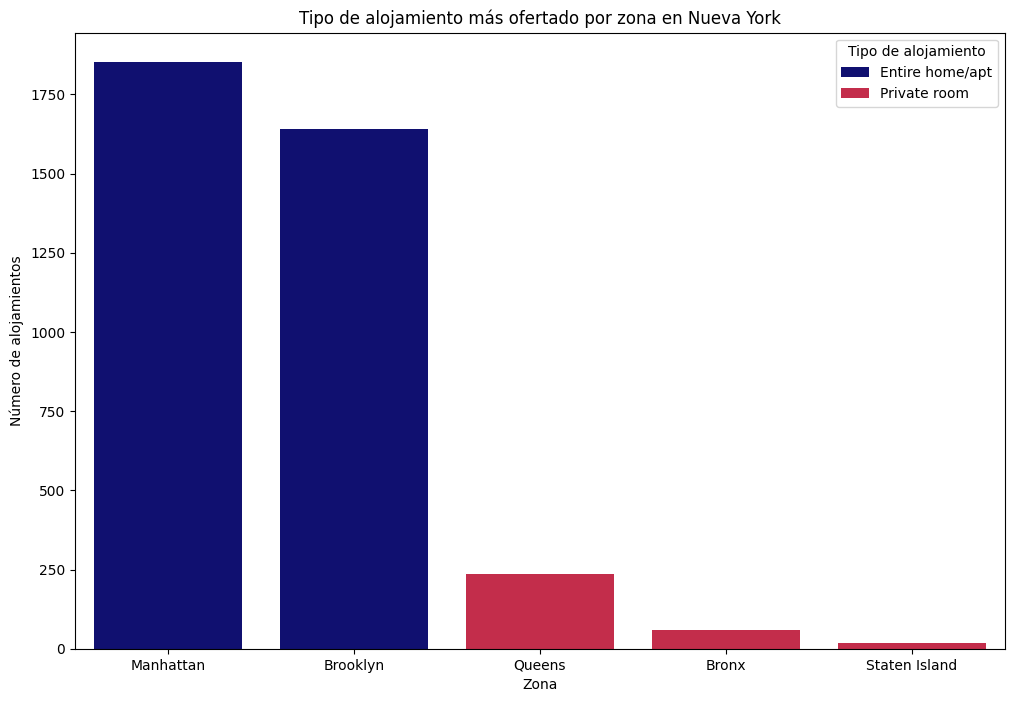

In [7]:
tipo_alojamiento = (data.groupby(['neighbourhood_group', 'room_type'])
                    .size()
                    .reset_index(name='count')
                    .loc[lambda x: x.groupby('neighbourhood_group')['count'].idxmax()]
                    .sort_values(by='count', ascending=False))

print(tipo_alojamiento)


import seaborn as sns

colores = {'Entire home/apt': 'navy', 'Private room': 'crimson', 'Shared room': 'springgreen'}

plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood_group', y='count', hue='room_type', data=tipo_alojamiento, palette=list(colores.values()))
plt.title('Tipo de alojamiento más ofertado por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Número de alojamientos')
plt.legend(title='Tipo de alojamiento')
plt.show()

En las zonas de mayor oferta domina el alquiler de viviendas completas, mientras que en el resto de zonas la oferta de habitaciones privadas es mayor. En ninguna zona domina la oferta de habitación compartida.  

### ¿Cuáles son las zonas más caras?¿Y las más populares?¿Coinciden unas con otras?

  neighbourhood_group       price  number_of_reviews
0               Bronx   72.411765          72.094118
1            Brooklyn  149.207588          55.719445
2           Manhattan  204.288598          52.439093
3              Queens  100.699074          59.381944
4       Staten Island  137.742857          71.314286

Zona más cara: Manhattan, con un precio medio de $204.29
Zona más popular: Bronx, con una media de 72.09 reviews


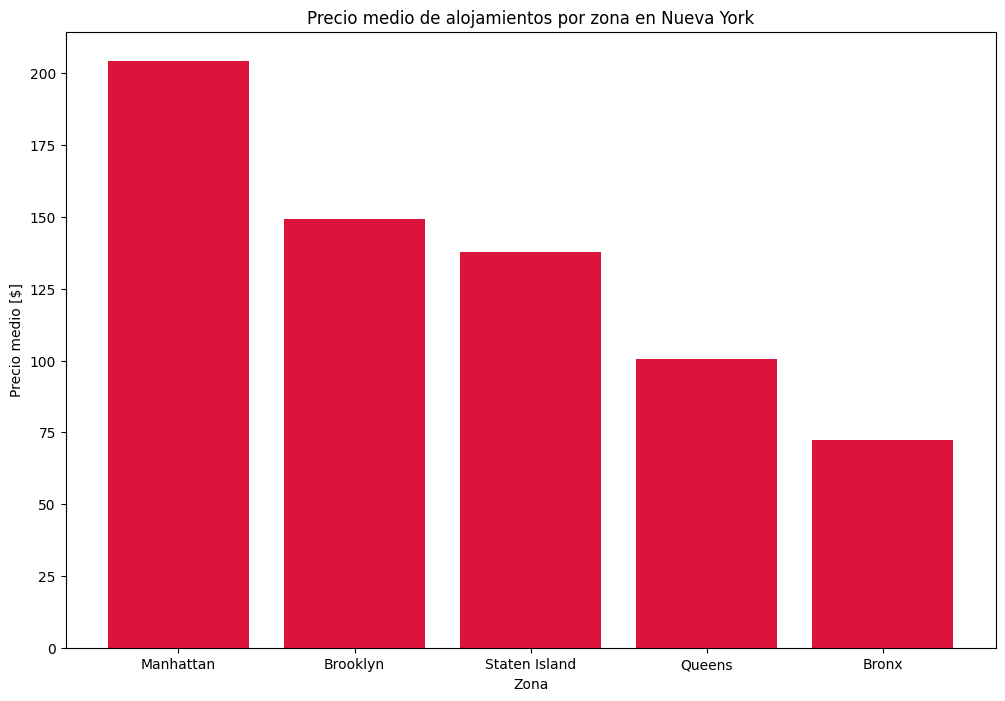

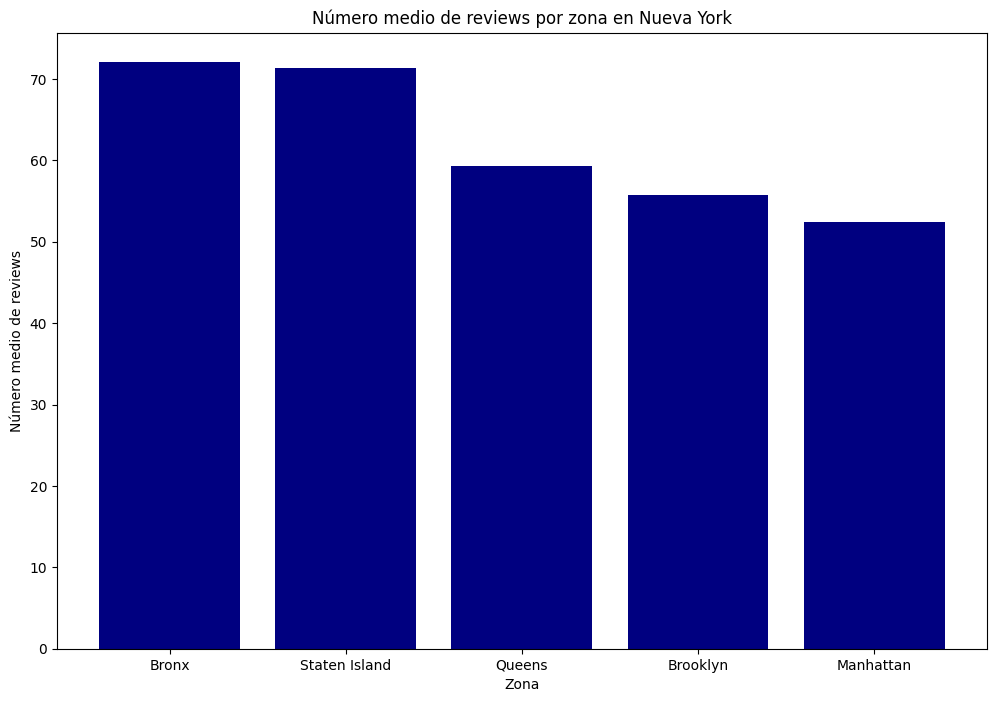

In [8]:
precio_review_stats = (data.groupby('neighbourhood_group')
                       .agg({'price': 'mean', 'number_of_reviews': 'mean'})
                       .reset_index())

print(precio_review_stats)

most_expensive = precio_review_stats.loc[precio_review_stats['price'].idxmax()]
print(f"\nZona más cara: {most_expensive['neighbourhood_group']}, con un precio medio de ${most_expensive['price']:.2f}")

most_popular = precio_review_stats.loc[precio_review_stats['number_of_reviews'].idxmax()]
print(f"Zona más popular: {most_popular['neighbourhood_group']}, con una media de {most_popular['number_of_reviews']:.2f} reviews")


# precios medios por zona
precio_review_stats = precio_review_stats.sort_values(by='price', ascending=False)
  
plt.figure(figsize=(12, 8))
plt.bar(precio_review_stats['neighbourhood_group'], precio_review_stats['price'], color='crimson')
plt.title('Precio medio de alojamientos por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Precio medio [$]')
plt.show()


# reviews medias por zona
precio_review_stats = precio_review_stats.sort_values(by='number_of_reviews', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(precio_review_stats['neighbourhood_group'], precio_review_stats['number_of_reviews'], color='navy')
plt.title('Número medio de reviews por zona en Nueva York')
plt.xlabel('Zona')
plt.ylabel('Número medio de reviews')
plt.show()

La zona más cara es Manhattan, con un precio medio de $204.29. La zona más popular es el Bronx, con una media de 120.88 reviews. Esto puede coincidir con que el Bronx es la zona más barata, con un precio medio de $72.41.

### ¿Los dueños de más de un alojamiento tienen sus ofertas en el mismo sitio o en sitios diferentes?

Primero, identificaremos los dueños que poseen más de un alojamiento y luego analizaremos si estos alojamientos se concentran en una misma zona o se distribuyen en diferentes áreas.

   neighbourhood_group  count
0                    1    490
1                    2      7


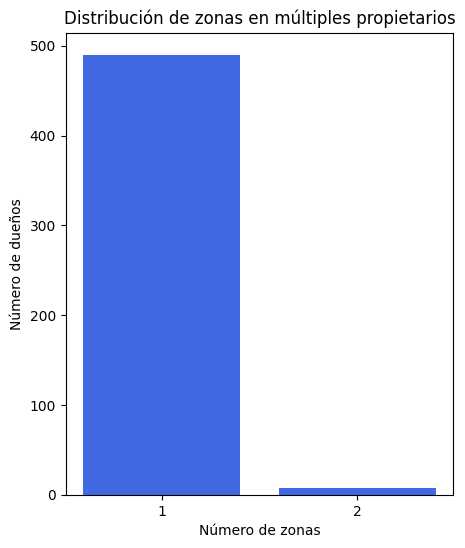

In [10]:
mult_prop = (data.groupby('host_id') # agrupamos por propietario
             .filter(lambda x: len(x) > 1) # filtramos multiples propietarios
             .groupby('host_id')['neighbourhood_group'] # agrupamos por propietario y cogemos la zona
             .nunique()
             .value_counts()
             .reset_index())

print(mult_prop)

plt.figure(figsize=(5, 6))
plt.bar(mult_prop['neighbourhood_group'], mult_prop['count'], color='royalblue')
plt.title('Distribución de zonas en múltiples propietarios')
plt.xlabel('Número de zonas')
plt.ylabel('Número de dueños')
plt.xticks([1, 2])
plt.show()

De los propietarios que ofrecen más de un alojamiento, la mayoría los tiene en la misma zona (1). Solo 7 propietarios tienen alojamientos en diferentes zonas, concretamente 2. En los datos no hay propietarios con alojamientos en más de 2 zonas.

### ¿Cuál es el alojamiento más caro teniendo en cuenta el número mínimo de noches por reserva?¿Y el más barato?

In [12]:
data['total_minimum_cost'] = data['price'] * data['minimum_nights']

# mas caro
most_expensive_listing = data.loc[data['total_minimum_cost'].idxmax()]
print(f"Alojamiento más caro: {most_expensive_listing['name']} en {most_expensive_listing['neighbourhood_group']} por ${most_expensive_listing['total_minimum_cost']:.2f} para una estancia mínima de {most_expensive_listing['minimum_nights']} noche/s")


# mas barato
cheapest_listing = data.loc[data['total_minimum_cost'].idxmin()]
print(f"Alojamiento más barato: {cheapest_listing['name']} en {cheapest_listing['neighbourhood_group']} por ${cheapest_listing['total_minimum_cost']:.2f} para una estancia mínima de {cheapest_listing['minimum_nights']} noche/s")

Alojamiento más caro: Desconocido en Manhattan por $400000.00 para una estancia mínima de 1000 noche/s
Alojamiento más barato: $455 Cozy 1bd, BKLYN Sublet March en Brooklyn por $18.00 para una estancia mínima de 1 noche/s


# Tarea 2

## Posibles mejoras

* Ofertas en productos complementarios a productos muy consumidos, de modo que fomentemos la venta de otros productos.
* Predecir las tendencias de consumo para mejorar la gestión de inventario y disponer de más o menos cantidad de cada producto en función de la oferta y la demanda, tanto estacional como por tienda.

## Lectura de datos

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

compras_path = './Datos/MO_dataset_compras.xlsx'
df_compras = pd.read_excel(compras_path, header=2)
df_compras.head()

,ID CLIENTE,ID COMPRA,Leche Pascual,Precio Leche Pascual (unidad),Leche FROIZ,Precio Leche Froiz (unidad),Pan,Precio Pan,Mantequilla,Precio Mantequilla,...,Precio Lechuga,Filetes Ternera (pack 1 kg),Precio Filetes Ternera,Filetes Cerdo (pack 1 kg),Precio Filetes Cerdo,Pizza Tarradellas,Precio Pizza Tarradellas,Pizza FROIZ,Precio Pizza FROIZ,TIPO COMPRA
0,100,1,6,0.9,0,0.0,2,0.6,0,0,...,0.7,1,28,0,0,0,0.0,0,0.0,Familiar
1,110,2,6,0.9,0,0.0,1,0.6,1,1,...,0.7,0,0,0,0,0,0.0,0,0.0,Familiar
2,120,3,6,0.9,0,0.0,0,0.0,0,0,...,0.7,1,28,0,0,0,0.0,0,0.0,Individual
3,130,4,0,0.0,6,0.6,1,0.6,1,1,...,0.0,0,0,0,0,1,2.7,0,0.0,Individual
4,140,5,0,0.0,6,0.6,1,0.6,0,0,...,0.0,0,0,1,11,0,0.0,1,1.7,Individual


In [14]:
clientes_path = './Datos/MO_dataset_clientes.xlsx'
df_clientes = pd.read_excel(clientes_path, header=2)
df_clientes.head()

,ID CLIENTE,Edad,Profesion
0,100,50,Liberal
1,110,60,Funcionario
2,120,40,Liberal
3,130,20,Estudiante
4,140,25,Estudiante


## Limpieza y preprocesamiento de datos

In [15]:
# verificamos si hay valores faltantes
print(f'{df_compras.isnull().sum()}\n')
print(df_clientes.isnull().sum())

ID CLIENTE                       0
ID COMPRA                        0
Leche Pascual                    0
Precio Leche Pascual (unidad)    0
Leche FROIZ                      0
Precio Leche Froiz (unidad)      0
Pan                              0
Precio Pan                       0
Mantequilla                      0
Precio Mantequilla               0
Cerveza                          0
Precio Cerveza (lata unidad)     0
Lechuga                          0
Precio Lechuga                   0
Filetes Ternera (pack  1 kg)     0
Precio Filetes Ternera           0
Filetes Cerdo (pack 1 kg)        0
Precio Filetes Cerdo             0
Pizza Tarradellas                0
Precio Pizza Tarradellas         0
Pizza FROIZ                      0
Precio Pizza FROIZ               0
TIPO COMPRA                      0
dtype: int64

ID CLIENTE    0
Edad          0
Profesion     0
dtype: int64


En este caso, no hay nulos en el dataset, por lo que no es necesario tratarlos.

## Tareas de análisis
### ¿Cuáles son los productos más vendidos?¿Y los que facturan más teniendo en cuenta el coste del producto?

                          index  num_ventas  facturacion
0                 Leche Pascual          54         48.6
1                   Leche FROIZ          66         39.6
2                           Pan          21         12.6
3                   Mantequilla           7          7.0
4                       Cerveza          54         35.1
5                       Lechuga          11          7.7
6  Filetes Ternera (pack  1 kg)           9        252.0
7     Filetes Cerdo (pack 1 kg)          10        110.0
8             Pizza Tarradellas          12         32.4
9                   Pizza FROIZ           9         15.3


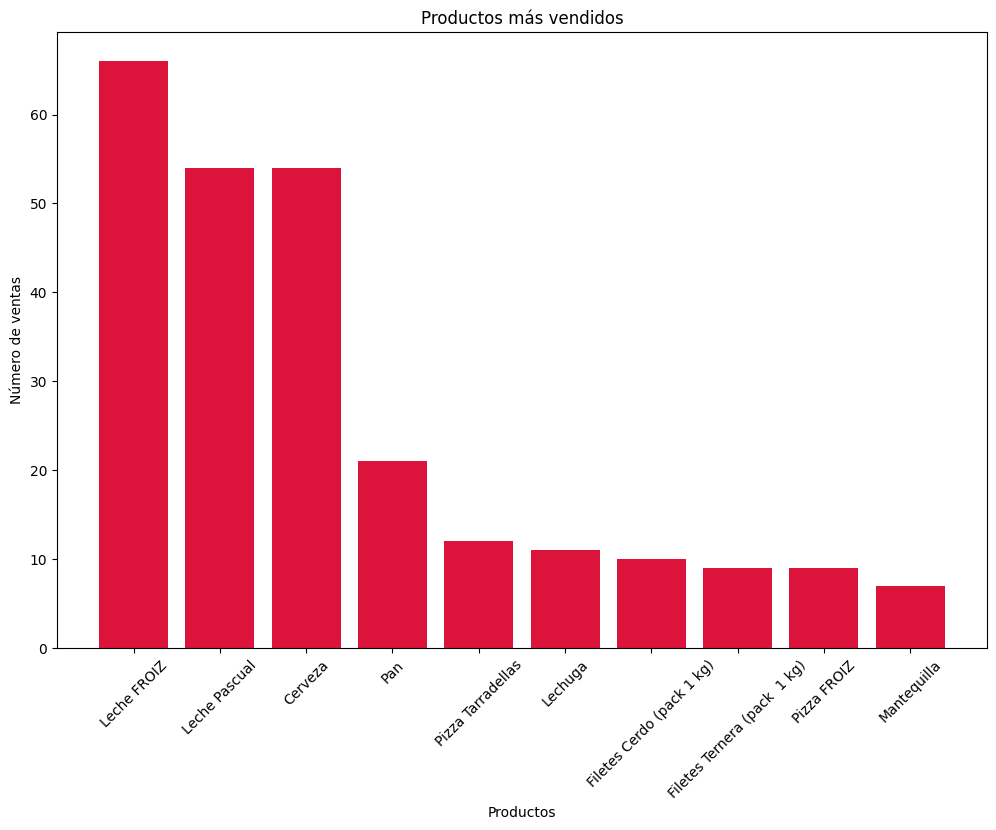

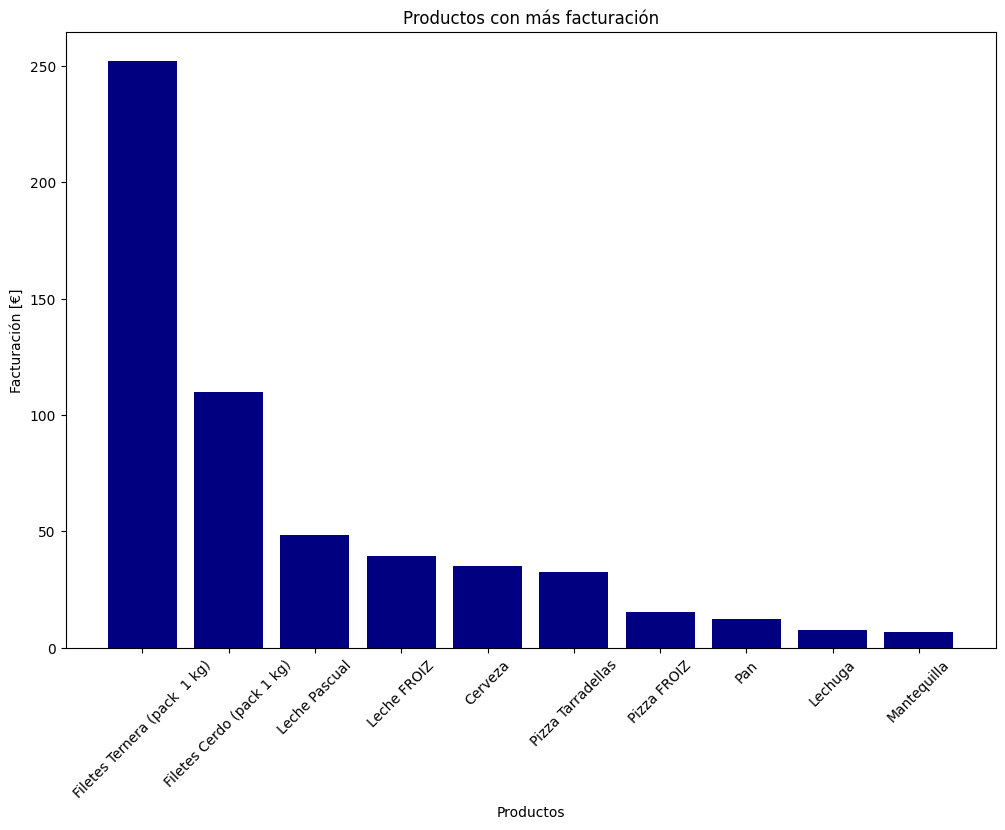

In [16]:
columnas = pd.Series(df_compras.columns)
productos = columnas[~columnas.str.contains('Precio|ID|TIPO')]
precios = columnas[columnas.str.contains('Precio')]

cuentas = pd.DataFrame({'num_ventas': df_compras[productos].sum(),
                        'facturacion': (df_compras[productos].mul(df_compras[precios].values)).sum()}).reset_index()

print(cuentas)

# productos
cuentas = cuentas.sort_values(by = 'num_ventas', ascending = False)

plt.figure(figsize=(12, 8))
plt.bar(cuentas['index'], cuentas['num_ventas'], color='crimson')
plt.title('Productos más vendidos')
plt.xlabel('Productos')
plt.ylabel('Número de ventas')
plt.xticks(rotation=45)
plt.show()


# facturacion
cuentas = cuentas.sort_values(by='facturacion', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(cuentas['index'], cuentas['facturacion'], color='navy')
plt.title('Productos con más facturación')
plt.xlabel('Productos')
plt.ylabel('Facturación [€]')
plt.xticks(rotation=45)
plt.show()

Entre los productos más vendidos se encuentran la leche (tanto de marca Pascual como de marca FROIZ), y la cerveza. Estos son productos de clara necesidad. Sin embargo, debido a su bajo coste, su facturación global está por detrás de la de la carne, tanto ternera como cerdo, que tienen un precio bastante más elevado. 

### ¿Qué tipo de productos se compran en conjunto?¿Identificas alguna relación entre ellos?

Lo mejor para identificar relaciones entre productos será una matriz de correlación.

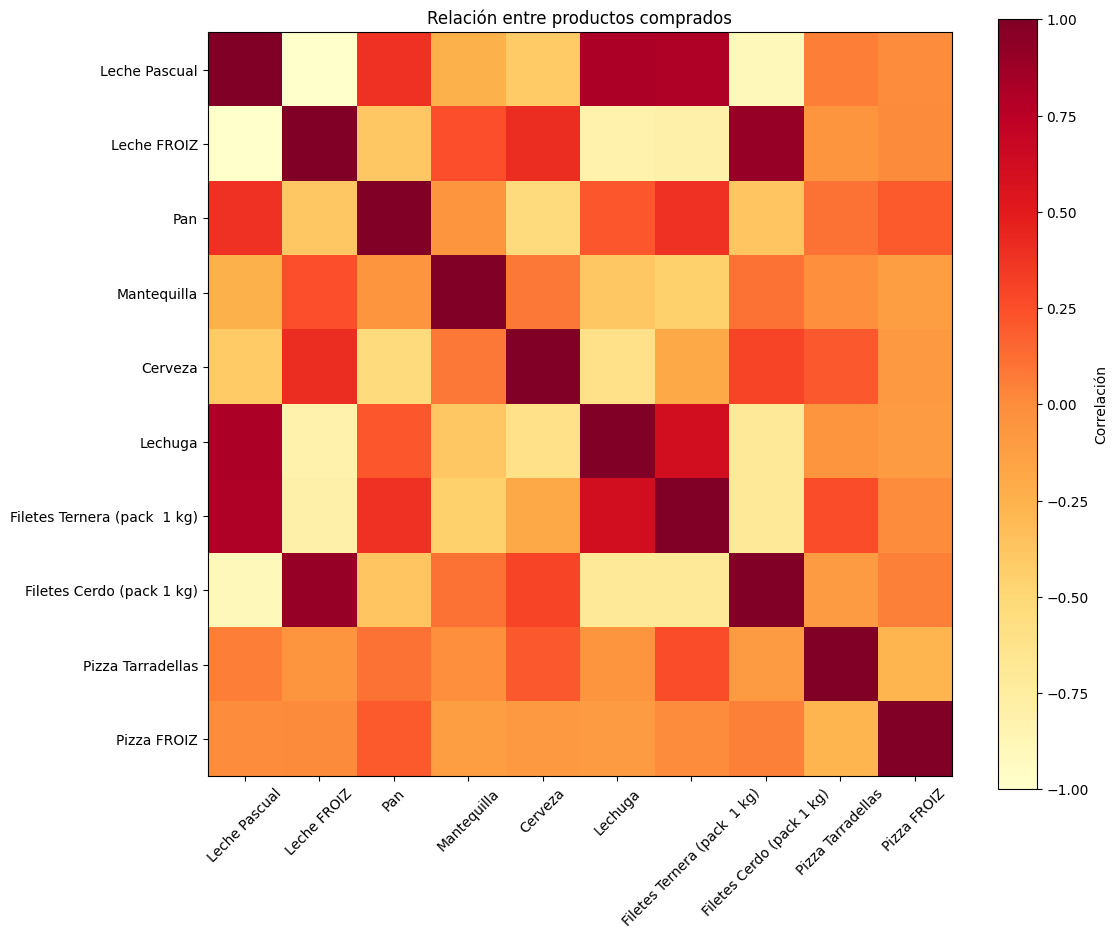

In [17]:
correlacion = df_compras[productos].corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlacion, cmap='YlOrRd')
plt.colorbar(label='Correlación')

plt.xticks(range(len(productos)), productos, rotation=45)
plt.yticks(range(len(productos)), productos)
plt.title('Relación entre productos comprados')
plt.show()

Una correlación positiva indica que si se compra un producto, es probable que se compre otro, una negativa indica que si se compra un producto, es probable que no se compre otro, y una correlación cercana a 0 indica que no hay relación entre los productos.

Podemos ver una clara correlación negativa entre las marcas de leche, ya que lo normal es comprar solo una marca y no ambas en una misma compra. Hay una correlación altamente positiva entre la leche Pascual y la ternera, la lechuga y el pan. Esto puede deberse a que son productos de uso regular, incluidos en una compra habitual. 

La leche Pascual tiene una correlación altamente negativa con la la carne de cerdo y positiva con la ternera, mientras que con la leche FROIZ ocurre lo contrario. Esto puede deberse a que la leche Pascual es más cara que la FROIZ, por lo que si se compra la primera, se compra la carne de ternera, que también es más cara que la de cerdo.

El resto de correlaciones son bastante próximas a 0, por lo que no evidencias patrones relevantes.

### ¿Cuál es el gasto medio por compra?

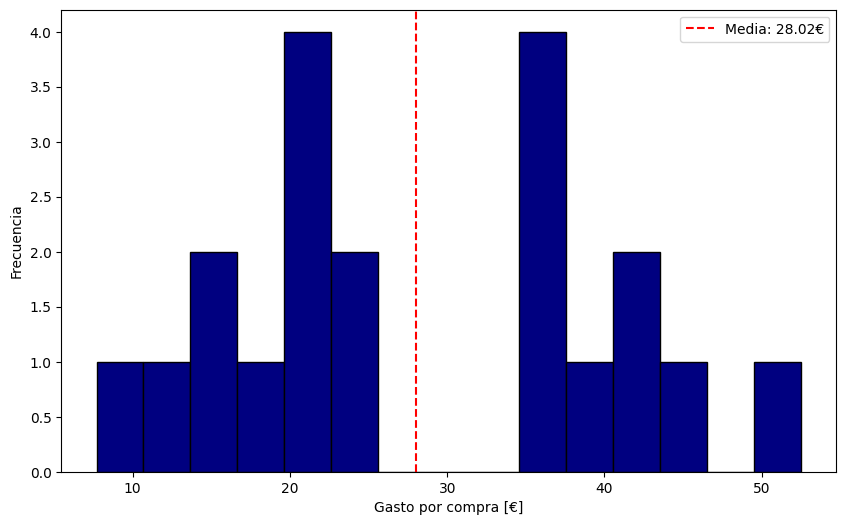

In [18]:
gasto = (df_compras[productos].mul(df_compras[precios].values)).sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(gasto, bins=15, color='navy', edgecolor='black')
plt.axvline(gasto.mean(), color='red', linestyle='dashed', label=f'Media: {gasto.mean():.2f}€')
plt.xlabel('Gasto por compra [€]')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

El gasto medio por compra es de unos 28€, pero hay dos grupos claramente separados. Uno con un gasto promedio de 40€ y otro con un gasto promedio de unos 18-20€. Además, los gastos más frecuente se situan de forma simétrica a ambos lados de la media, en unos intervalos (19, 22)€ y (34,37)€, de forma aproximada.

### ¿Qué perfiles tienen los clientes? ¿Qué segmentación harías en base a los datos disponibles de los clientes?

Veamos la distribución de edades de los clientes, así como la edad por profesión

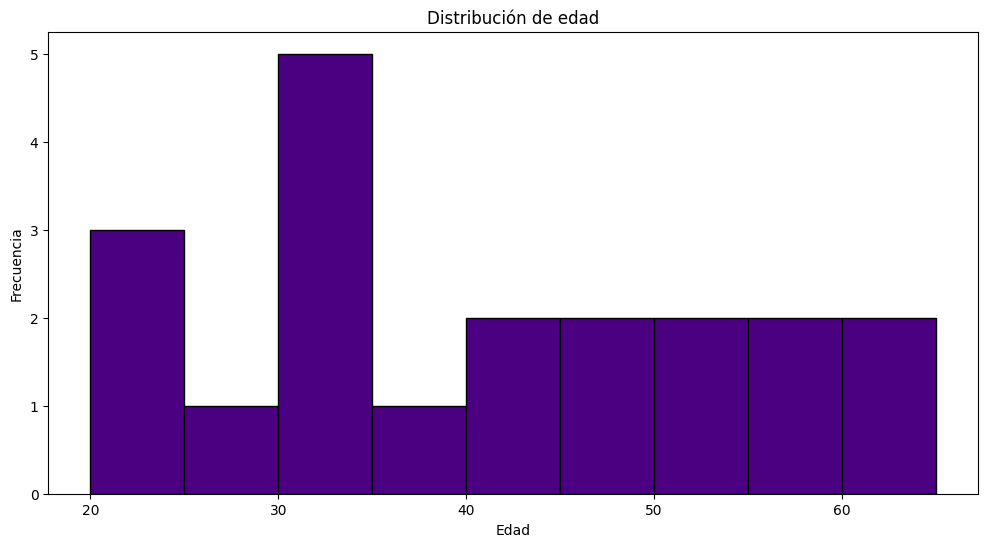

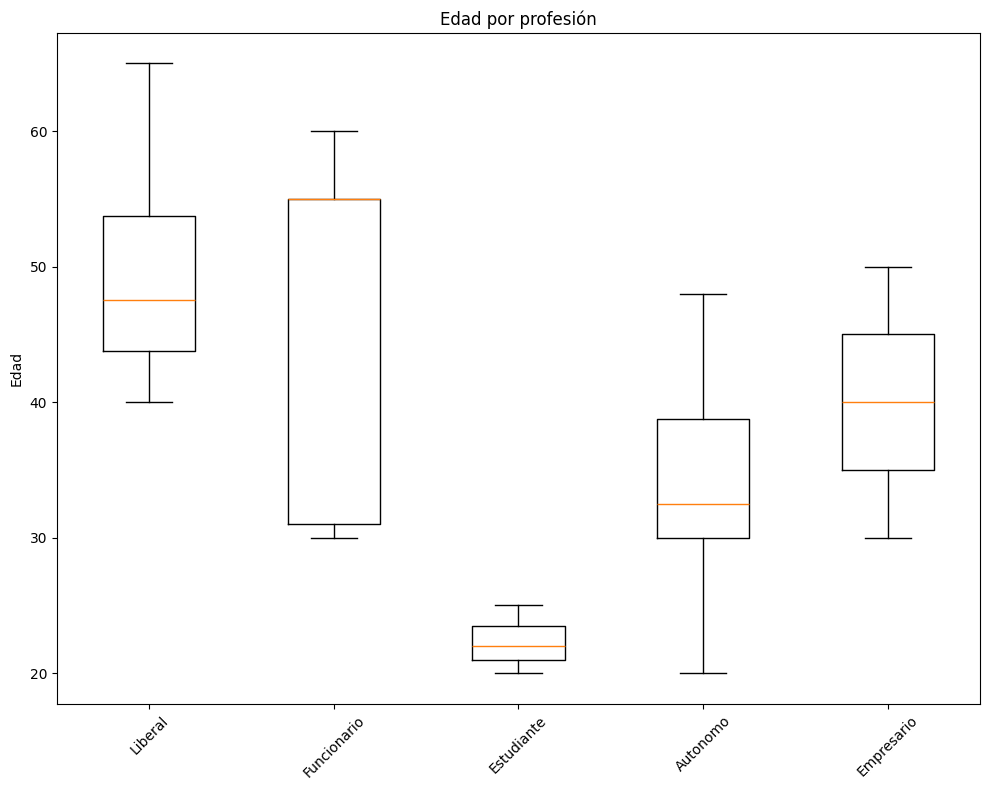

In [19]:
# distribucion de edad
plt.figure(figsize=(12, 6))
plt.hist(df_clientes['Edad'], bins=9, color='indigo', edgecolor='black')
plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


# edad por profesion
plt.figure(figsize=(10, 8))
boxplot = plt.boxplot([df_clientes[df_clientes['Profesion'] == prof]['Edad'] 
                       for prof in df_clientes['Profesion'].unique()], 
                       tick_labels=df_clientes['Profesion'].unique())

plt.title('Edad por profesión')
plt.xticks(rotation=45)
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

Vemos que el grueso de nuestros clientes son mayores de 40 años, manteniendo una distribución uniforme en las edades comprendidas entre 40 y 65 años. No obstante, los intervalos de edad donde más clientes concentramos son en treintañeros de hasta 35 años, y jovenes de hasta 25 años. En base a la edad, podriamos segmentar nuestra clientela en tres grupos: jóvenes (<30), adultos jovenes (30-40) y adultos/mayores (>40).

La distribución de edad por profesión nos refleja resultados esperables: la mediana de edad de los estudiantes se sitúa en poco más de 20 años, con poca variabilidad entorno a la misma, de modo que tenemos pocos clientes estudiantes mayores de 25. Los autónomos, empresarios y liberales presentan una variabilidad de edad similar, pero en rangos distintos: El grueso de nuestros clientes autónomos tienen entre 30 y 40 años, siendo lo más frecuente poco más de 30; los empresarios se concentran entre 35 y 45, estando la mayor parte sobre los 40; los liberales están, de forma aproximada, entre 45 y 55 años, siendo lo más frecuente poco menos de 50. El grupo de trabajo más variado son los funcionarios: nuestros clientes con este oficio se sitúan entre los 30 y los 55 años, con una mediana cercana al intervalo superior de este intervalo. Por supuesto tenemos clientes en estas profesiones con edades fuera de estos rangos, pero no es lo más común. 

Como lo que nos interesa realmente es cuánto dinero gasten, lo mejor será segmentar por profesiones, ya que los sueldos, y por tanto los gastos, tenderán a ser más similares que por rangos de edad. 

### ¿Detectas diferencias en las compras para cada perfil de cliente?

Veamos las posibles diferencias en las compras de los clientes de cada profesión. Para ello, analizaremos el gasto medio por profesión y veremos la cantidad de productos comprados por profesión. 

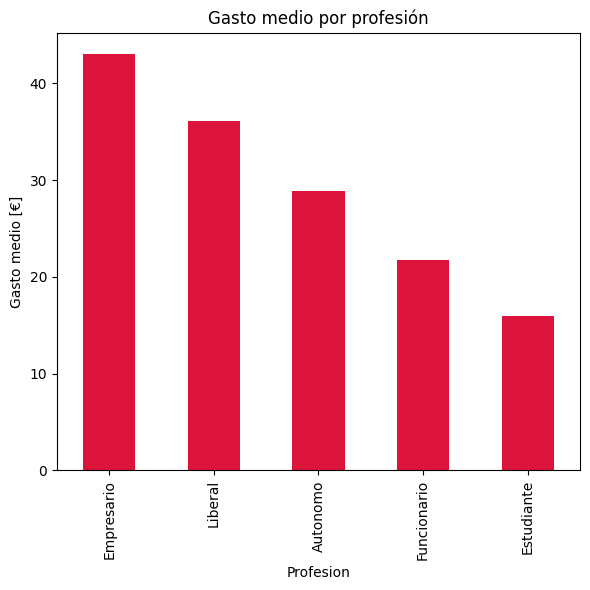

<Figure size 2000x600 with 0 Axes>

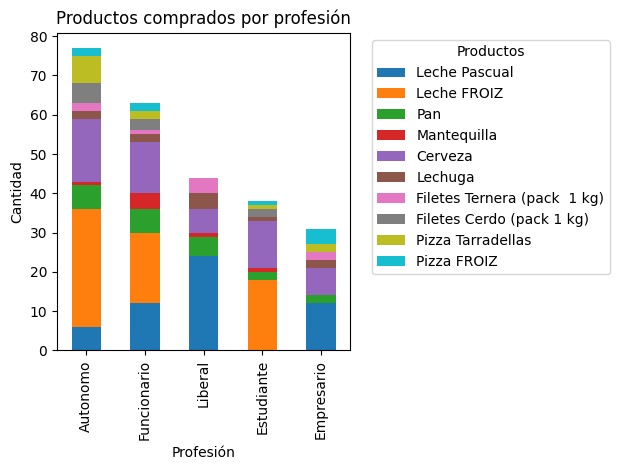

In [20]:
df_completo = pd.merge(df_compras, df_clientes, on='ID CLIENTE')

# gasto por compra
df_completo['gasto_total'] = (df_completo[productos].mul(df_completo[precios].values)).sum(axis=1)

df_completo_gasto = (df_completo.groupby('Profesion')['gasto_total']
                     .agg(['mean', 'count'])
                     .round(2)
                     .sort_values(by='mean', ascending=False))

# gasto medio por profesión
plt.figure(figsize=(6, 6))
df_completo_gasto['mean'].plot(kind='bar', color='crimson')
plt.title('Gasto medio por profesión')
plt.ylabel('Gasto medio [€]')
plt.tight_layout()
plt.show()


# productos mas comprados por profesion
productos_por_profesion = (df_completo.groupby('Profesion')[productos]
                          .sum()
                          .assign(total = lambda x: x.sum(axis=1))
                          .sort_values(by='total', ascending=False)
                          .drop('total', axis=1))

plt.figure(figsize=(20, 6))
productos_por_profesion.plot(kind='bar', stacked=True)
plt.title('Productos comprados por profesión')
plt.xlabel('Profesión')
plt.ylabel('Cantidad')
plt.legend(title='Productos', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Respecto al gasto medio, era de esperar que los que tienen a priori un mayor sueldo (empresarios), sean los que más dinero dejen en nuestra caja; y que los estudiantes sean los más conservadores en este aspecto, ya que algunos no trabajan y, los que sí, suelen tener trabajos mal pagados debido a la "falta de cualificación y/o experiencia". 

Ahora veamos los productos que compra cada profesión: 
* Tiene sentido que los empresarios, que son los que menos tiempo pasan en casa, sean los que menos cantidad adquieran, mientras que los autónomos sean los que más, por el motivo contrario. 
* Notamos un predominio de la leche marca FROIZ (más económica) respecto a la Pascual en autonomos, funcionarios y estudiantes, mientras que los que más dinero manejan optan claramente por la Pascual. 
* Respecto a la carne, de nuevo hay una clara distinción entre las profesiones anteriores: cerdo (más económico) sobre ternera para autonomos, funcionarios y estudiantes; y nada de cerdo en el caso de liberales y empresarios. 
* Los gastos en cerveza y lechuga son más o menos similares en todos los grupos, aunque el primer producto destaca entre autonomos, funcionarios y, por supuesto, estudiantes. 
* Por último, llama la atención la preferencia de los empresarios por la pizza FROIZ en contraposición a la pizza Tarradellas dominante entre los autónomos, cuando por el precio cabría pensar justo lo contrario.